## Polynomial regression


In [22]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [23]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3  # random numbers from -3 to 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
X[0]
# array([-0.75275929])

array([-0.75275929])

(-3.0, 3.0, 0.0, 10.0)

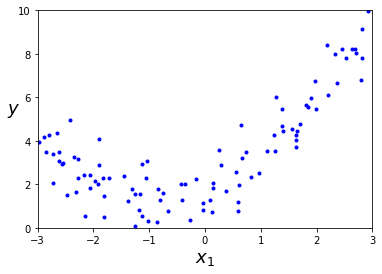

In [24]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

### Compare different degree of freedom

In [47]:
def plot_high_degrees(degree, X, y):
    for style, width, degree in (("g-", 1, degree[0]), ("b-", 2, degree[1]), ("r-", 2, degree[2])):
        polynomial_regression = Pipeline([
                ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("lin_reg", LinearRegression()),
            ])
        polynomial_regression.fit(X, y)
        X_new=np.linspace(-3, 3, 100).reshape(100, 1)
        y_pred = polynomial_regression.predict(X_new)
        plt.plot(X_new, y_pred, style, label=f'polynomial regression with degree: {degree}', linewidth=width)

    plt.plot(X, y, "ko", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([-3, 3, 0, 10])

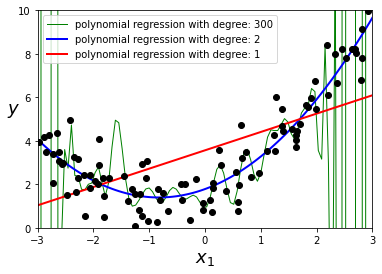

In [48]:
plot_high_degrees([300,2,1], X, y)

array([[-3.        ],
       [-2.93939394],
       [-2.87878788],
       [-2.81818182],
       [-2.75757576],
       [-2.6969697 ],
       [-2.63636364],
       [-2.57575758],
       [-2.51515152],
       [-2.45454545],
       [-2.39393939],
       [-2.33333333],
       [-2.27272727],
       [-2.21212121],
       [-2.15151515],
       [-2.09090909],
       [-2.03030303],
       [-1.96969697],
       [-1.90909091],
       [-1.84848485],
       [-1.78787879],
       [-1.72727273],
       [-1.66666667],
       [-1.60606061],
       [-1.54545455],
       [-1.48484848],
       [-1.42424242],
       [-1.36363636],
       [-1.3030303 ],
       [-1.24242424],
       [-1.18181818],
       [-1.12121212],
       [-1.06060606],
       [-1.        ],
       [-0.93939394],
       [-0.87878788],
       [-0.81818182],
       [-0.75757576],
       [-0.6969697 ],
       [-0.63636364],
       [-0.57575758],
       [-0.51515152],
       [-0.45454545],
       [-0.39393939],
       [-0.33333333],
       [-0